In diesem Beispiel lernen Sie weitere elementare Anweisungen von Qiskit kennen. Qiskit ist vor allem bei der Visualisierung von Quantenzuständen sowie der Veranschaulichung der Wirkung von Quantengates nützlich. Wir wollen Qiskit zunächst nutzen, um die Wirkungen der und bereits bekannten Gates zu beobachten. Dazu bauen wir einen Schaltkreis mit zwei Qubits und zwei klassischen Bits auf.\\

Der erste Schritt besteht immer darin, von Qiskit die benöigten Bibliotheken einzubinden:

In [6]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere, plot_histogram
%matplotlib inline
from math import sqrt, pi

Danach wird der Quantenschaltkreis definiert und die Qubits initialisiert sowie das Backend definiert:

In [7]:
qc = QuantumCircuit(2, 2)
anfangszustand = [0,1]   # Hier wird der Ausgangszustand zu |1> definiert
qc.initialize(anfangszustand, 1)
backend = BasicAer.get_backend('statevector_simulator')

Das Qubit q[0] befindet sich im Zustand $|0\rangle$ und das Qubit q[1] im Zustand $|1\rangle$. Wir arbeiten mit dem 'statevector_simulator', das erlaubt uns, die beiden Zustände in je einer Blochkugel darzustellen. Dazu benötigen wir die beiden folgenden Befehle:

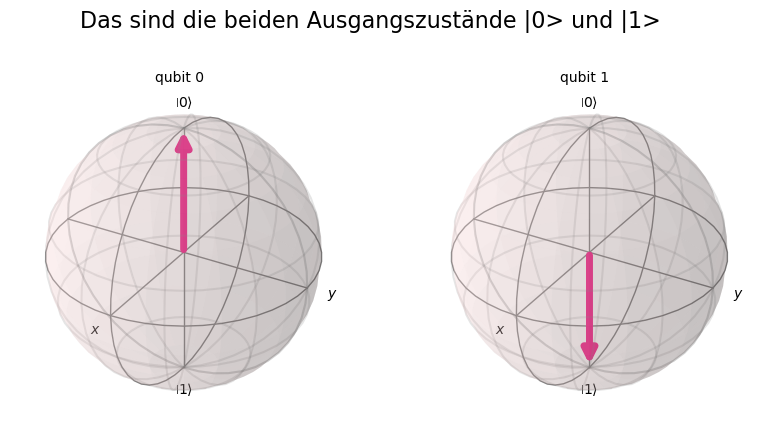

In [4]:
job = execute(qc, backend).result()
plot_bloch_multivector(job.get_statevector(qc), title="Das sind die beiden Ausgangszustände |0> und |1>")

Nun können wir damit beginnen, die uns bekannten Gates auf die beiden Qubits anzuwenden und das Ergebnis gleich wirder in den beiden Blochkugeln darstellen:

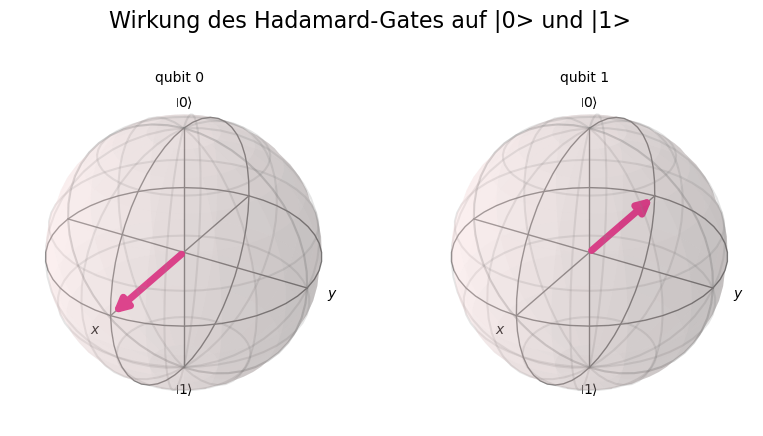

In [4]:
qc.h(0)
qc.h(1)
job = execute(qc, backend).result()
plot_bloch_multivector(job.get_statevector(qc), title="Wirkung des Hadamard-Gates auf |0> und |1>")

$H$ legt den Vektor $|0\rangle$ in die $x$-Achse in positiver Richtung und den Vektor $|1\rangle$ ebenfalls in die $x$-Achse, aber in negativer Richtung. Die beiden Vektoren haben keine Komponente in $z$-Richtung. Das bedeutet, dass die Messwahrscheinlichkeit eine $0$ oder eine  $1$ zu messen beide jeweils bei $p=0.5$ bzw. bei $50\%$ liegen. Deshalb sind die Zustände in der uns bereits bekannten Weise zu schreiben:

$H|0\rangle=\tfrac{1}{\sqrt{2}}|0\rangle+\tfrac{1}{\sqrt{2}}|1\rangle$ bzw. $H|1\rangle=\tfrac{1}{\sqrt{2}}|0\rangle-\tfrac{1}{\sqrt{2}}|1\rangle$.

Auf diese beiden Zustände lassen wir nun das $X$-Gate los:

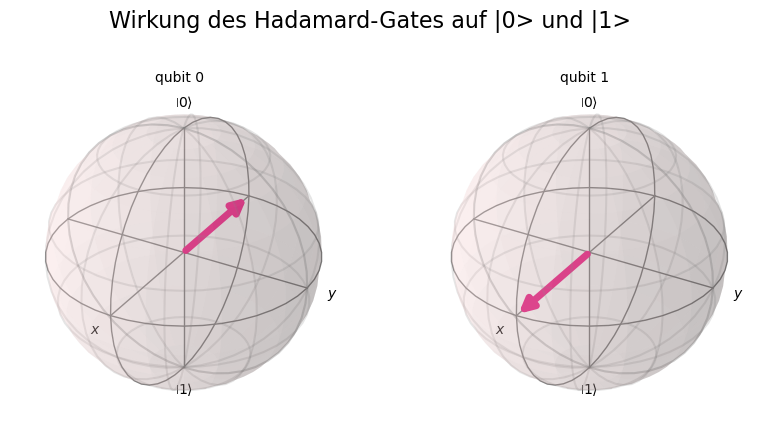

In [5]:
qc.z(0)
qc.z(1)
job = execute(qc, backend).result()
plot_bloch_multivector(job.get_statevector(qc), title="Wirkung des Hadamard-Gates auf |0> und |1>")

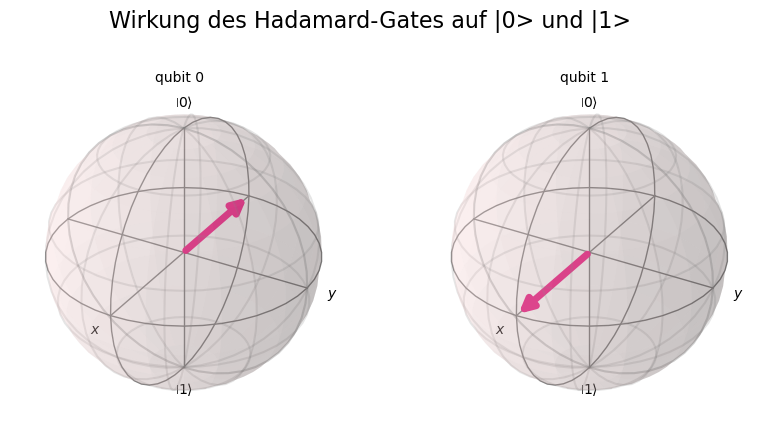

In [6]:
qc.x(0)
qc.x(1)
job = execute(qc, backend).result()
plot_bloch_multivector(job.get_statevector(qc), title="Wirkung des Hadamard-Gates auf |0> und |1>")

Das hat keine Änderung bewirkt, denn das $X$-Gate entspricht in der Blochkugel-Darstellung einer Rotation um die $x$-Achse um den Winkel $\pi=180°$. Lassen wir nun das $Z$-Gate wirken:

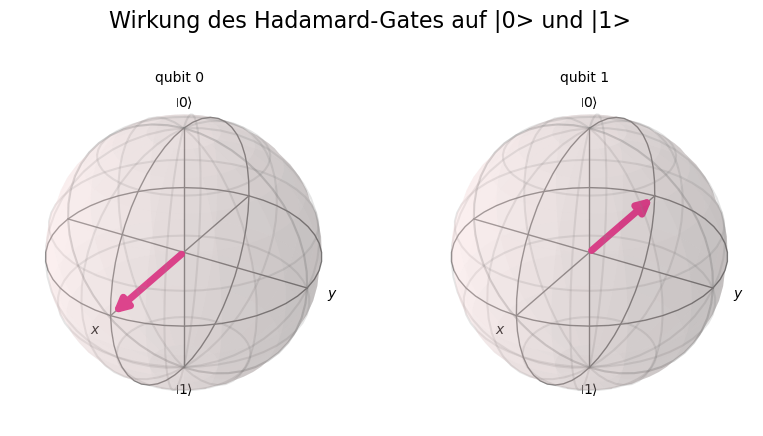

In [7]:
qc.z(0)
qc.z(1)
job = execute(qc, backend).result()
plot_bloch_multivector(job.get_statevector(qc), title="Wirkung des Hadamard-Gates auf |0> und |1>")

Das $Z$-Gate kann somit als eine Rotation um die $z$-Achse um den Winkel $\pi=180°$ aufgefasst werden. Schauen wir abschliessend noch, was das $Y$-Gate bewirkt:

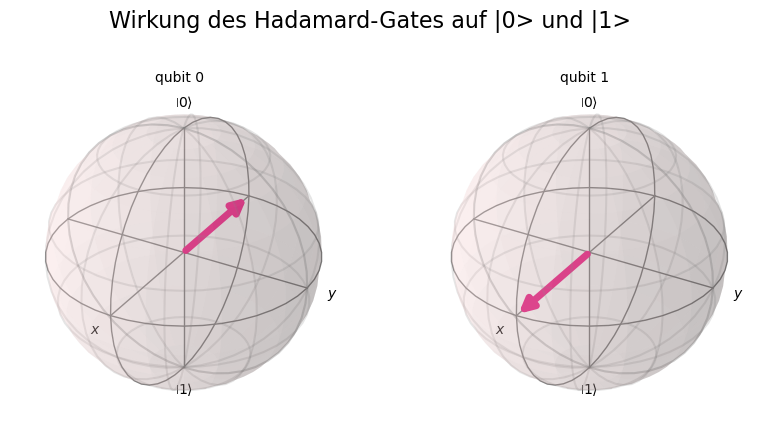

In [8]:
qc.y(0)
qc.y(1)
job = execute(qc, backend).result()
plot_bloch_multivector(job.get_statevector(qc), title="Wirkung des Hadamard-Gates auf |0> und |1>")

Dies scheint einer Rotation um die $y$-Achse um den Winkel $\pi=180°$ zu entsprechen.

Setzen wir nun unsere beiden Qubits wieder in den Anfangszustand zurück und wenden das $CNOT$-Gate nach dem $H$-Gate an.

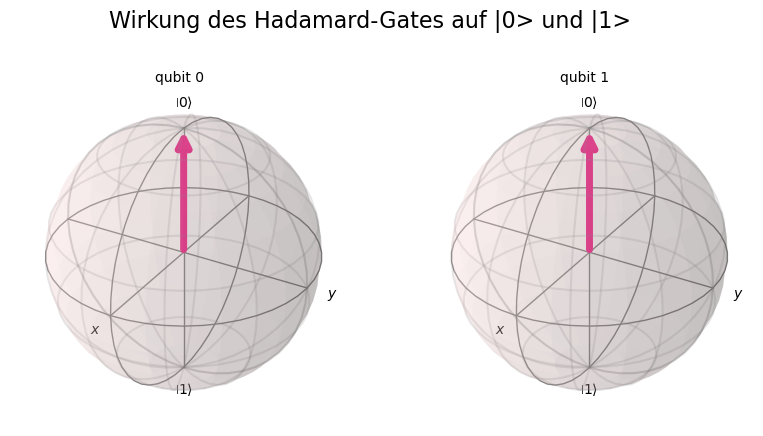

In [9]:
initial_state = [0,1]   # Hier wird der Ausgangszustand zu |1> definiert
qc.initialize([1,0], 0)
qc.initialize([1,0], 1)
job = execute(qc, backend).result()
plot_bloch_multivector(job.get_statevector(qc), title="Wirkung des Hadamard-Gates auf |0> und |1>")

Nun die Verschränkungsoperation $CNOT$ $H$

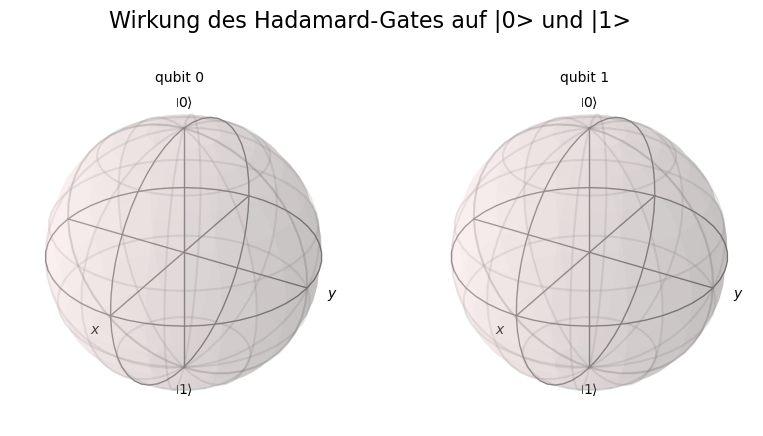

In [10]:
qc.h(0)
qc.cnot(0,1)
job = execute(qc, backend).result()
plot_bloch_multivector(job.get_statevector(qc), title="Wirkung des Hadamard-Gates auf |0> und |1>")

Ooops! Die Zustandsvektoren sind verschwunden, was ist passiert? 
Wir haben hier die Verschränkungsoperation auf die beiden Qubits angewendet. Damit verlieren diese ihre Eigenständigkeit. Der Zustand eines Qubits ist nicht mehr eigenständig definiert. Nur der gemeinsame Zustand ergibt hier noch einen Sinn:
$$C_xH|00\rangle=\tfrac{1}{\sqrt{2}}|00\rangle+\tfrac{1}{\sqrt{2}}|11\rangle$$

Verschränkte Zustände lassen sich somit nicht mehr durch Blochkugeln darstellen. Dafür eignet sich die Q-sphere von Qiskit besser.Wir definieren den Schaltkreis neu, damit ist das Register wieder im Ausgangszustand $|00\rangle$.

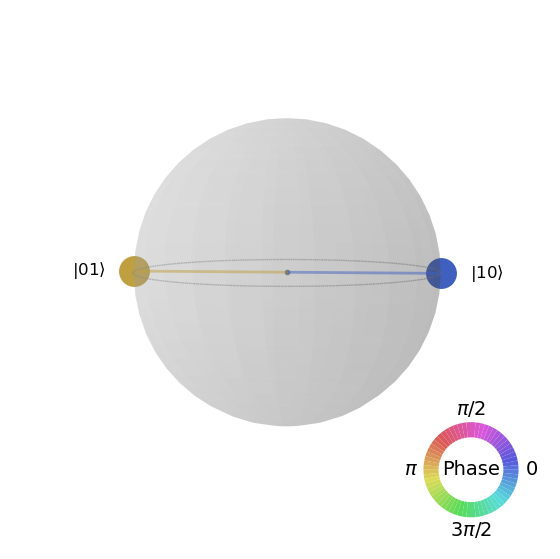

In [11]:
qc = QuantumCircuit(2)
qc.initialize([0,1], 0)
qc.initialize([0,1], 1)
qc.h(0)
qc.cx(0, 1)

state = Statevector(qc)
plot_state_qsphere(state)

Wir haben in der Variablen qc immer noch den Registerzustand aus der vorhergehenden Zelle gespeichert. Diesen Zustand können wir auch als Histogramm darstellen:

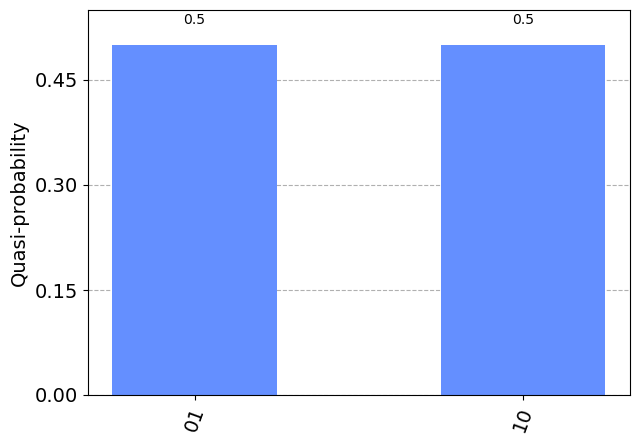

In [12]:
plot_histogram(execute(qc, backend).result().get_counts())

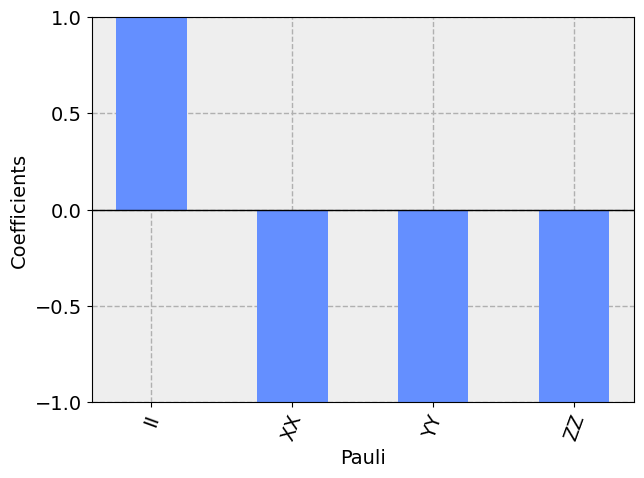

In [13]:
sv=Statevector(qc)
sv.draw(output='paulivec')

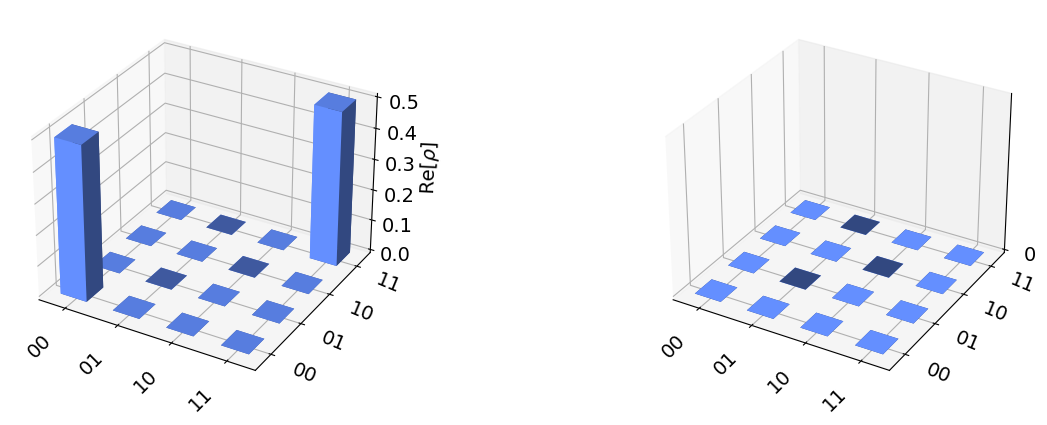

In [14]:
sv=Statevector([1/sqrt(2), 0, 0, -1/sqrt(2)])
sv.draw(output='city')

Auch den Schaltkreis können wir leicht zeichnen lassen:

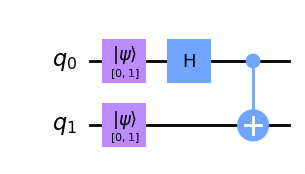

In [15]:
qc.draw('mpl')

Schliesslich wollen wir alle Qubits messen

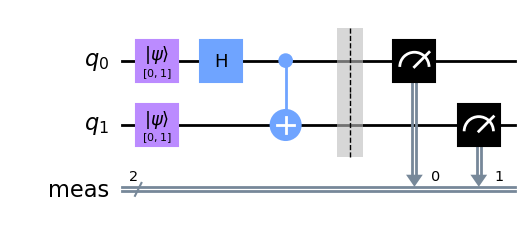

In [17]:
qc.measure_all()
qc.draw('mpl')

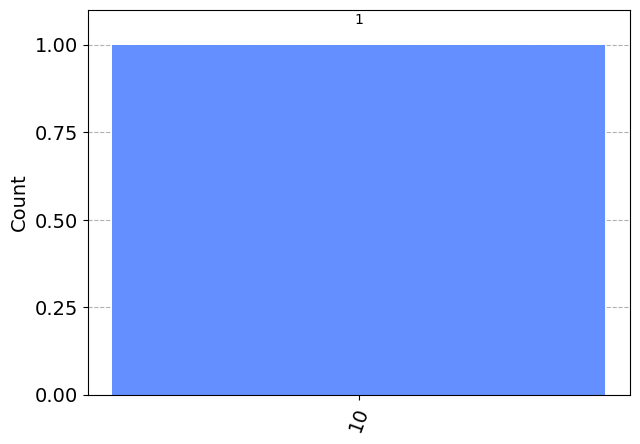

In [18]:
plot_histogram(execute(qc, backend).result().get_counts())